# <u>Submission instructions</u>
### Submission in pairs unless otherwise authorized
<ul style="font-size: 17px">
<li> This notebook contains all the questions. You should follow the instructions below.</li>
<li> Solutions for both theoretical and practical parts should be written in this notebook</li>
</ul>

<h3> Moodle submission</h3>


<p style="font-size: 17px">
You should submit three files:
</p>
<ul style="font-size: 17px">
<li>IPYNB notebook:
  <ul>
  <li>All the wet and dry parts, including code, graphs, discussion, etc.</li>
  </ul>
</li>
<li>PDF file:
  <ul>
  <li>Export the notebook to PDF. Make sure that all the cells are visible.</li>
  </ul>
</li>
<li>Pickle files:
  <ul>
    <li>As requested in Q2.a and Q3.a</li>
  </ul>
</li>
<li> PY file:
  <ul>
   <li> As requested in Q3.a</li>
   </ul>
   </li>
</ul>
<p style="font-size: 17px">
All files should be in the following format: "HW1_ID1_ID2.file"
<br>
Good Luck!
</p>

<h1> Question 1</h1>

## I. Softmax Derivative (10pt)

<p style="font-size: 17px">
Derive the gradients of the softmax function and demonstrate how the expression can be reformulated solely by using the softmax function, i.e., in some expression where only $softmax(x)$, but not $x$, is present). Recall that the softmax function is defined as follows:

$$softmax(x)_i = \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}}$$

### I. Softmax Derivative - Answer:
$$\frac{\partial softmax(x)_i}{\partial x_k} = \text{...}$$

1.⁠ ⁠When \( i = j \):
\[
\begin{aligned}
\frac{\partial \text{softmax}(\mathbf{x})_j}{\partial x_k} &= \frac{e^{x_j} \sum_{j=1}^{n} e^{x_j} - (e^{x_j})^2}{\left(\sum_{j=1}^{n} e^{x_j}\right)^2} \\
&= \frac{e^{x_j}}{\sum_{j=1}^{n} e^{x_j}} \left(1 - \frac{e^{x_j}}{\sum_{j=1}^{n} e^{x_j}}\right) \\
&= \text{softmax}(\mathbf{x})_j \left(1 - \text{softmax}(\mathbf{x})_j\right)
\end{aligned}
\]

2.⁠ ⁠When \( i {!=} j \):
\[
\begin{aligned}
\frac{\partial \text{softmax}(\mathbf{x})_i}{\partial x_k} &= \frac{- e^{x_i} e^{x_j}}{\left(\sum_{j=1}^{n} e^{x_j}\right)^2} \\
&= -\frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}} \cdot \frac{e^{x_j}}{\sum_{j=1}^{n} e^{x_j}} \\
&= - \text{softmax}(\mathbf{x})_i \text{softmax}(\mathbf{x})_j
\end{aligned}
\]

## II. Cross-Entropy Gradient (10pt)
<p style="font-size: 17px">
Derive the gradient of cross-entropy loss with regard to the inputs of a softmax function. i.e., find the gradients with respect to the softmax input vector $\theta$, when the prediction is denoted by $\hat{y} = softmax(\theta)$. Remember the cross entropy function is:
$$CE(y, \hat{y}) = -\sum_i y_i log(\hat{y_i})$$


<p style="font-size: 17px">where $y$ is the one-hot label vector, and $\hat{y}$ is the predicted probability vector for all classes.

### II. Cross-Entropy Gradient - Answer

<!--- write your answer -->
$$\frac{\partial CE(y, \hat{y})}{\partial\theta} = \text{Go for it}$$

In [4]:
!pip install pymupdf pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 44.2 MB/s eta 0:00:00


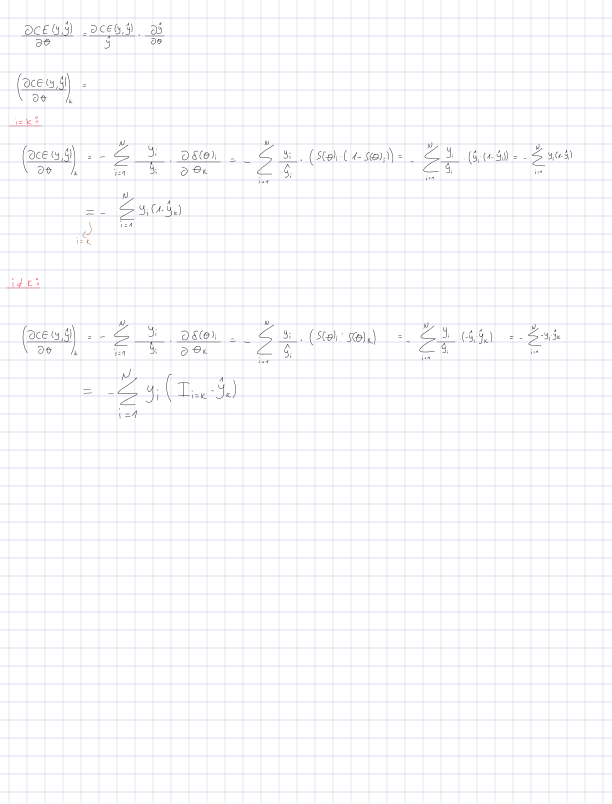

In [5]:
import fitz  # PyMuPDF
from PIL import Image
import IPython.display as display

# Path to your PDF
pdf_path = "/content/1.b.pdf"

# Open the PDF
doc = fitz.open(pdf_path)

# Loop through each page, render it, and display it
for page_num in range(len(doc)):
    # Render page as an image
    page = doc.load_page(page_num)
    pix = page.get_pixmap()

    # Convert to an image using PIL
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

    # Display the image
    display.display(img)

# Close the document
doc.close()


# Question 2

## I. Derivative Of Activation Functions (10pt)

<p style="font-size: 17px">
The following cell contains an implementation of some activation functions. Implement the corresponding derivatives.</p>

In [1]:
import torch

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def tanh(x):
    return torch.div(torch.exp(x) - torch.exp(-x), torch.exp(x) + torch.exp(-x))


def softmax(x):
    exp_x = torch.exp(x.T - torch.max(x, dim=-1).values).T  # Subtracting max(x) for numerical stability
    return exp_x / exp_x.sum(dim=-1, keepdim=True)

In [2]:
def d_sigmoid(x):
    s = sigmoid(x)
    return s * (1 - s)


def d_tanh(x):
    t = tanh(x)
    return 1 - t**2


def d_softmax(x):
    s = softmax(x)
    the_jacobian = torch.zeros(x.shape[0], x.shape[1], x.shape[1])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            for k in range(x.shape[1]):
                if j == k:
                    the_jacobian[i, j, k] = s[i, j] * (1 - s[i, j])
                else:
                    the_jacobian[i, j, k] = -s[i, j] * s[i, k]
    return the_jacobian

## II. Train a Fully Connected network on MNIST (30pt)

<p style="font-size: 17px">In the following exercise, you will create a classifier for the MNIST dataset.
You should write your own training and evaluation code and meet the following
constraints:
<ul>
<li> You are only allowed to use torch tensor manipulations.</li>
<li> You are NOT allowed to use:
  <ul>
  <li> Auto-differentiation - backward()</li>
  <li> Built-in loss functions</li>
  <li> Built-in activations</li>
  <li> Built-in optimization</li>
  <li> Built-in layers (torch.nn)</li>
  </ul>
  </li>
</ul>
</h4>

<p style="font-size: 17px">
 a) The required classifier class is defined.
<ul style="font-size: 17px">
<li> You should implement the forward and backward passes of the model.
<li> Train the model and plot the model's accuracy and loss (both on train and test sets) as a function of the epochs.
<li> You should save the model's weights and biases. Change the student_ids to yours.
</ul>
<p style="font-size: 17px">In this section, you <b>must</b> use the "set_seed" function with the given seed and <b>sigmoid</b> as an activation function.
</p>

In [3]:
import torch
import torchvision
from torch.utils.data import DataLoader

import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Constants
SEED = 42
EPOCHS = 16
BATCH_SIZE = 32
NUM_OF_CLASSES = 10

# Setting seed
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ["PYTHONHASHSEED"] = str(seed)


# Transformation for the data
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torch.flatten])


# Cross-Entropy loss implementation
def one_hot(y, num_of_classes=10):
    hot = torch.zeros((y.size()[0], num_of_classes))
    hot[torch.arange(y.size()[0]), y] = 1
    return hot

def cross_entropy(y, y_hat):
    return -torch.sum(one_hot(y) * torch.log(y_hat)) / y.size()[0]

In [4]:
# Create dataloaders
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                            download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)


test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE,)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 50.3MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.67MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 12.7MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.13MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
class FullyConnectedNetwork:
    def __init__(self, input_size, output_size, hidden_size1, activiation_func, lr=0.01):
        # parameters
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size1 = hidden_size1

        # activation function
        self.activation_func = activiation_func

        # weights
        self.W1 = torch.randn(self.input_size, self.hidden_size1)
        self.b1 = torch.zeros(self.hidden_size1)

        self.W2 = torch.randn(self.hidden_size1, self.output_size)
        self.b2 = torch.zeros(self.output_size)

        self.lr = lr

    # Initialize weights and biases
        self.W1 = torch.randn(self.input_size, self.hidden_size1) * 0.01
        self.b1 = torch.zeros(self.hidden_size1)
        self.W2 = torch.randn(self.hidden_size1, self.output_size) * 0.01
        self.b2 = torch.zeros(self.output_size)

    def forward(self, x):
        self.z1 = x @ self.W1 + self.b1
        self.a1 = self.activation_func(self.z1)
        self.z2 = self.a1 @ self.W2 + self.b2
        self.a2 = torch.exp(self.z2 - torch.max(self.z2, dim=1, keepdim=True).values)
        self.a2 = self.a2 / torch.sum(self.a2, dim=1, keepdim=True)
        return self.a2

    def backward(self, x, y, y_hat):
        y_one_hot = one_hot(y, self.output_size)

        # Gradients for the second layer
        dz2 = (y_hat - y_one_hot) / x.size(0)
        dW2 = self.a1.T @ dz2
        db2 = dz2.sum(dim=0)

        # Gradients for the first layer
        da1 = dz2 @ self.W2.T
        dz1 = da1 * d_sigmoid(self.z1)
        dW1 = x.T @ dz1
        db1 = dz1.sum(dim=0)

        # Update weights and biases
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

In [6]:
set_seed(SEED)
LEARNING_RATE=0.001
model = FullyConnectedNetwork(784, 10, 128, sigmoid, lr=LEARNING_RATE)

Epoch 1/16, Train Loss: 2.3000, Train Acc: 0.1141, Test Loss: 2.2980, Test Acc: 0.1697
Epoch 2/16, Train Loss: 2.2963, Train Acc: 0.1189, Test Loss: 2.2941, Test Acc: 0.1912
Epoch 3/16, Train Loss: 2.2919, Train Acc: 0.1230, Test Loss: 2.2888, Test Acc: 0.1977
Epoch 4/16, Train Loss: 2.2857, Train Acc: 0.1290, Test Loss: 2.2812, Test Acc: 0.2132
Epoch 5/16, Train Loss: 2.2766, Train Acc: 0.1521, Test Loss: 2.2699, Test Acc: 0.2686
Epoch 6/16, Train Loss: 2.2628, Train Acc: 0.2108, Test Loss: 2.2528, Test Acc: 0.3263
Epoch 7/16, Train Loss: 2.2421, Train Acc: 0.2731, Test Loss: 2.2271, Test Acc: 0.3712
Epoch 8/16, Train Loss: 2.2113, Train Acc: 0.3317, Test Loss: 2.1894, Test Acc: 0.4029
Epoch 9/16, Train Loss: 2.1671, Train Acc: 0.3818, Test Loss: 2.1363, Test Acc: 0.4246
Epoch 10/16, Train Loss: 2.1064, Train Acc: 0.4243, Test Loss: 2.0652, Test Acc: 0.4507
Epoch 11/16, Train Loss: 2.0277, Train Acc: 0.4629, Test Loss: 1.9761, Test Acc: 0.4818
Epoch 12/16, Train Loss: 1.9326, Train Ac

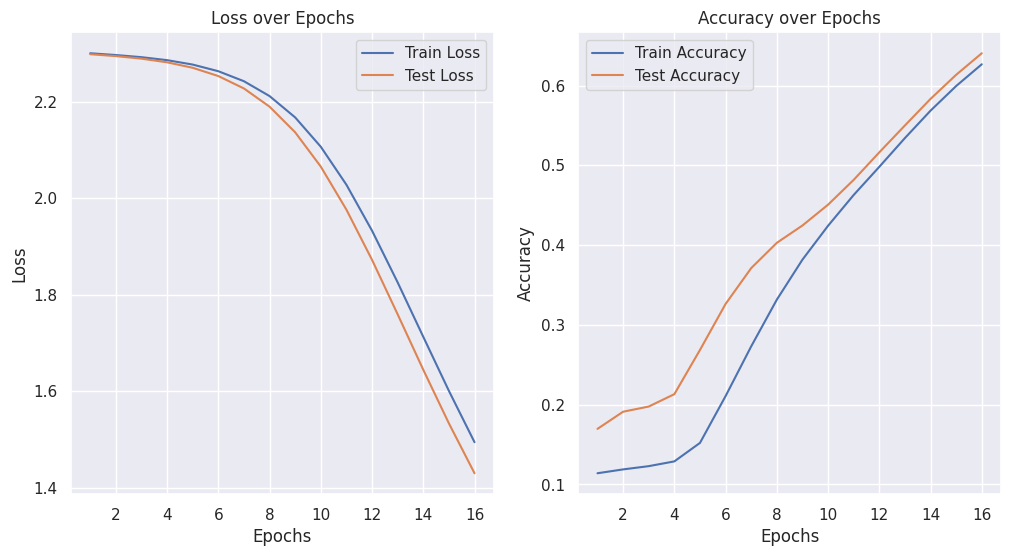

In [7]:
train_losses, train_accuracies = [], []
test_losses, test_accuracies = [], []

for epoch in range(EPOCHS):
    # Training phase
    total_loss, correct = 0, 0
    for images, labels in train_dataloader:
        images = images.view(-1, 28 * 28)

        # Forward pass
        outputs = model.forward(images)

        # Loss computation
        loss = cross_entropy(labels, outputs)
        total_loss += loss.item()

        # Backward pass
        model.backward(images, labels, outputs)

        # Accuracy computation
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()

    train_losses.append(total_loss / len(train_dataloader))
    train_accuracies.append(correct / len(train_dataset))

    # Evaluation phase
    total_loss, correct = 0, 0
    with torch.no_grad():
        for images, labels in test_dataloader:
            images = images.view(-1, 28 * 28)
            outputs = model.forward(images)

            loss = cross_entropy(labels, outputs)
            total_loss += loss.item()

            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()

    test_losses.append(total_loss / len(test_dataloader))
    test_accuracies.append(correct / len(test_dataset))

    print(f"Epoch {epoch+1}/{EPOCHS}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Test Acc: {test_accuracies[-1]:.4f}")

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS + 1), train_losses, label='Train Loss')
plt.plot(range(1, EPOCHS + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, EPOCHS + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.show()

In [9]:
students_ids = "931215248_207596990"
torch.save({"W1": model.W1, "W2": model.W2, "b1": model.b1, "b2": model.b2}, f"HW1_{students_ids}.pkl")

<p style="font-size: 17px"> b) Train the model with various learning rates (at least 3).
<ul style="font-size: 17px">
<li> Plot the model's accuracy and loss (both on train and test sets) as a function of the epochs.
<li>Discuss the differences in training with different learning rates. Support your answer with plots.

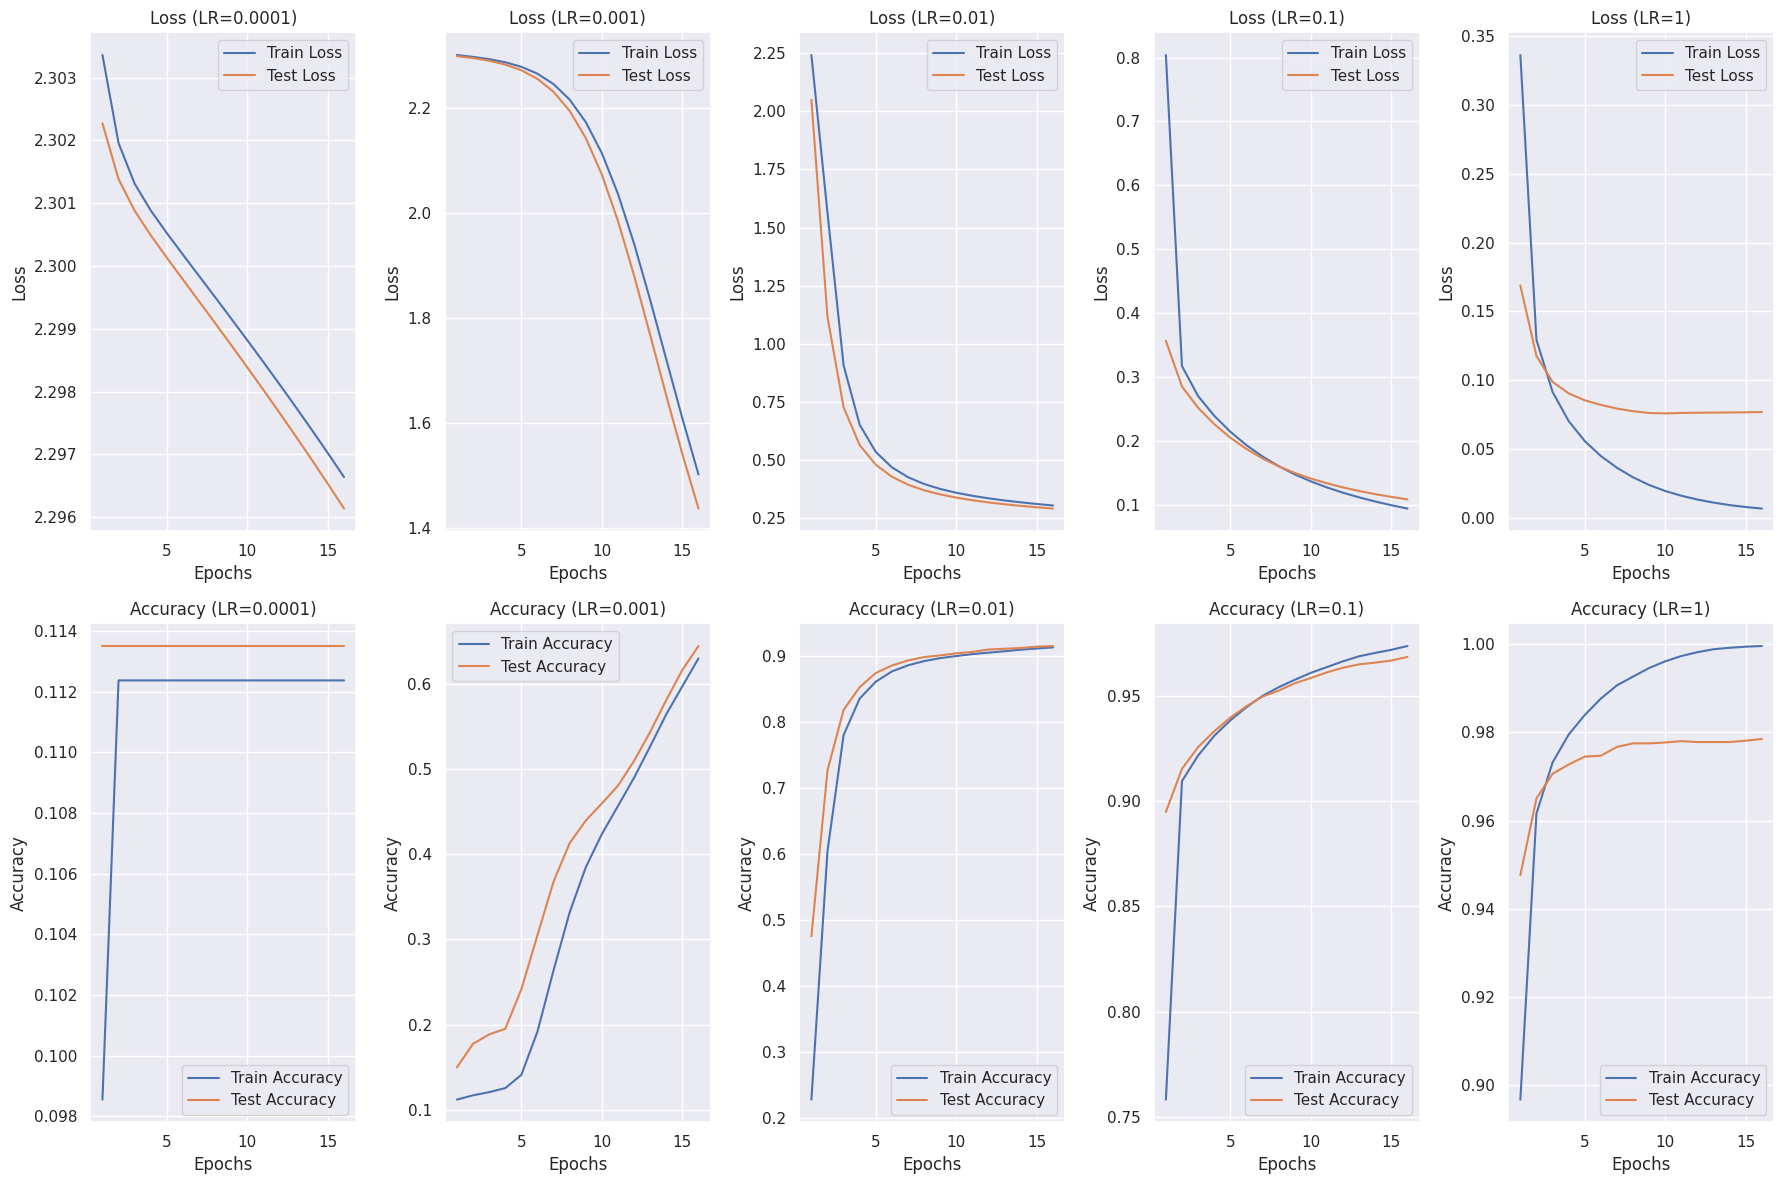

In [10]:
# Training with multiple learning rates
lr_list = [0.0001, 0.001, 0.01, 0.1, 1]
results = {}

for lr in lr_list:
    model = FullyConnectedNetwork(784, 10, 128, sigmoid, lr=lr)

    train_losses, train_accuracies = [], []
    test_losses, test_accuracies = [], []

    for epoch in range(EPOCHS):
        # Training phase
        total_loss, correct = 0, 0
        for images, labels in train_dataloader:
            images = images.view(-1, 28 * 28)

            # Forward pass
            outputs = model.forward(images)

            # Loss computation
            loss = cross_entropy(labels, outputs)
            total_loss += loss.item()

            # Backward pass
            model.backward(images, labels, outputs)

            # Accuracy computation
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()

        train_losses.append(total_loss / len(train_dataloader))
        train_accuracies.append(correct / len(train_dataset))

        # Evaluation phase
        total_loss, correct = 0, 0
        with torch.no_grad():
            for images, labels in test_dataloader:
                images = images.view(-1, 28 * 28)
                outputs = model.forward(images)

                loss = cross_entropy(labels, outputs)
                total_loss += loss.item()

                preds = outputs.argmax(dim=1)
                correct += (preds == labels).sum().item()

        test_losses.append(total_loss / len(test_dataloader))
        test_accuracies.append(correct / len(test_dataset))

    results[lr] = {
        'train_losses': train_losses,
        'train_accuracies': train_accuracies,
        'test_losses': test_losses,
        'test_accuracies': test_accuracies
    }

# Plotting results
plt.figure(figsize=(18, 12))

for i, lr in enumerate(lr_list):
    plt.subplot(2, len(lr_list), i + 1)
    plt.plot(range(1, EPOCHS + 1), results[lr]['train_losses'], label='Train Loss')
    plt.plot(range(1, EPOCHS + 1), results[lr]['test_losses'], label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss (LR={lr})')
    plt.legend()

    plt.subplot(2, len(lr_list), i + len(lr_list) + 1)
    plt.plot(range(1, EPOCHS + 1), results[lr]['train_accuracies'], label='Train Accuracy')
    plt.plot(range(1, EPOCHS + 1), results[lr]['test_accuracies'], label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy (LR={lr})')
    plt.legend()

plt.tight_layout()
plt.show()

Learning Rate = 0.0001:
Extremely slow convergence leads to underfitting. Both train and test loss decrease marginally, while accuracy remains stagnant around 11%.

Learning Rate = 0.001:
Steady and consistent learning is observed. Loss decreases progressively, and accuracy improves to approximately 60%, demonstrating effective training.

Learning Rate = 0.01:
Optimal convergence with balanced generalization. Loss declines rapidly, and accuracy stabilizes around 90% with minimal signs of overfitting.

Learning Rate = 0.1:
Rapid convergence occurs, but early signs of overfitting appear. Loss decreases sharply, and a small gap emerges between train and test accuracy (~95%).

Learning Rate = 1:
Overly aggressive learning leads to severe overfitting. Train loss approaches zero, and train accuracy reaches 100%, while test accuracy plateaus around 98%.

# Question 3

## I. Implement and Train a CNN (30pt)

<p style="font-size: 17px"> As you might know, there are many dogs on campus. Sometimes, understanding the emotions of a dog can be challenging, and people might mistakenly try to pet it when it is sad or angry. As a data scientist, you have been asked to assist Technion's students. Your task is to create a "dog emotion classifier.
<br>
Your code should meet the following constraints:
<ul style="font-size: 17px">
<li> Your classifier must be CNN based</li>
<li> You are not allowed to use any pre-trained model</li>
</ul>
<br>
<p style="font-size: 17px">
To satisfy your boss, your model must achieve at least 70% accuracy on the test set. Your boss also emphasized that the model will be deployed on smartphones, so it should have a small number of parameters. 25% of your grade for this task will be based on the number of parameters your model uses — fewer parameters will yield a higher grade.</p>

#### Stages
<ol style="font-size: 17px">
<li>Perform a short EDA (Exploratory Data Analysis).</li>
 <li>Train the model and plot its accuracy and loss (for both the training and validation sets) as a function of the epochs.</li>
  <li>Report the test set accuracy.</li>
   <li>Discuss the progress you made and describe your final model.</li>
    </ol>
<br>
 Your data is in <code>hw1_data/dog_emotion</code>.
<br>
Tou can define a custom dataset (as in tutorial 3) or use <code>torchvision.datasets.ImageFolder</code>.

 #### Submission
 <p style="font-size: 17px"> In addition to the code in the notebook, you should submit:
<ul style="font-size: 17px">
<li> a <code>.py</code> file containing your model class.</li>
<li> a <code>.pkl</code> file containing the weight of your model</li>
</ul>

Mounted at /content/drive
Classes: ['happy', 'relaxed', 'angry', 'sad']
Class happy: 708 images
Class relaxed: 700 images
Class angry: 700 images
Class sad: 700 images


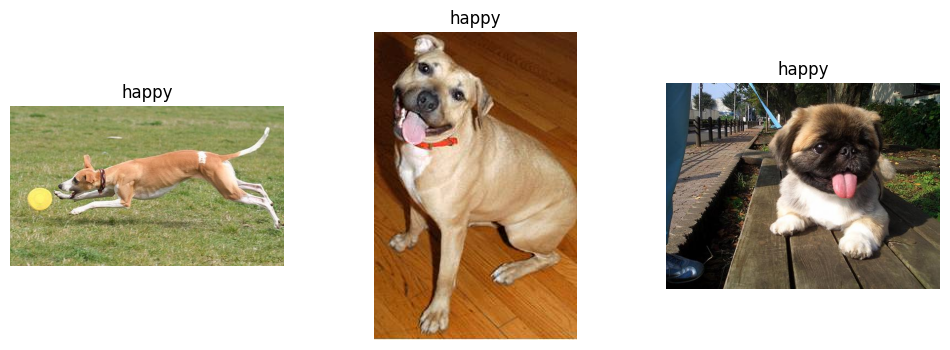

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

train_dir = "/content/drive/MyDrive/Dog_Emotion/train"
val_dir = "/content/drive/MyDrive/Dog_Emotion/val"
test_dir = "/content/drive/MyDrive/Dog_Emotion/test"

# Quick EDA
train_classes = os.listdir(train_dir)
print("Classes:", train_classes)


# Count images per class
for cls in train_classes:
    class_path = os.path.join(train_dir, cls)
    print(f"Class {cls}: {len(os.listdir(class_path))} images")

# Show a few sample images
sample_class = train_classes[0]
sample_class_path = os.path.join(train_dir, sample_class)
sample_images = os.listdir(sample_class_path)[:3]

fig, axs = plt.subplots(1, 3, figsize=(12,4))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(sample_class_path, img_name)
    image = Image.open(img_path)
    axs[i].imshow(image)
    axs[i].axis("off")
    axs[i].set_title(f"{sample_class}")
plt.show()



Number of parameters: 53796
Epoch [1/1000]: Train Loss: 1.4486, Train Acc: 29.77%, Val Loss: 1.4230, Val Acc: 31.75%, Test Acc: 27.88%
Epoch [2/1000]: Train Loss: 1.4221, Train Acc: 28.60%, Val Loss: 1.3840, Val Acc: 31.25%, Test Acc: 31.00%
Epoch [3/1000]: Train Loss: 1.4103, Train Acc: 27.96%, Val Loss: 1.3856, Val Acc: 29.25%, Test Acc: 29.25%
Epoch [4/1000]: Train Loss: 1.3963, Train Acc: 29.24%, Val Loss: 1.3740, Val Acc: 31.25%, Test Acc: 32.75%
Epoch [5/1000]: Train Loss: 1.3960, Train Acc: 29.38%, Val Loss: 1.3809, Val Acc: 32.75%, Test Acc: 30.75%
Epoch [6/1000]: Train Loss: 1.3901, Train Acc: 29.24%, Val Loss: 1.3817, Val Acc: 33.25%, Test Acc: 31.00%
Epoch [7/1000]: Train Loss: 1.3895, Train Acc: 28.17%, Val Loss: 1.3803, Val Acc: 28.75%, Test Acc: 31.25%
Epoch [8/1000]: Train Loss: 1.3902, Train Acc: 29.20%, Val Loss: 1.3803, Val Acc: 29.50%, Test Acc: 28.38%
Epoch [9/1000]: Train Loss: 1.3788, Train Acc: 28.85%, Val Loss: 1.3867, Val Acc: 30.50%, Test Acc: 28.75%
Epoch [10

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff718d0fd90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff718d0fd90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch [608/1000]: Train Loss: 0.9839, Train Acc: 70.90%, Val Loss: 1.3723, Val Acc: 63.50%, Test Acc: 66.00%


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff718d0fd90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff718d0fd90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch [609/1000]: Train Loss: 0.9892, Train Acc: 74.29%, Val Loss: 1.3830, Val Acc: 62.75%, Test Acc: 69.25%


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff718d0fd90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff718d0fd90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch [610/1000]: Train Loss: 0.9569, Train Acc: 72.97%, Val Loss: 1.3918, Val Acc: 61.00%, Test Acc: 69.12%


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff718d0fd90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
Exception ignored in:     Exception ignored in: if w.is_alive():<function _MultiProcessingDataLoaderIter.__del__ at 0x7ff718d0fd90><function _MultiProcessingDataLoaderIter.__del__ at 0x7ff718d0fd90>
Exception ignored in: 

  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
Traceback (most recent call last):
Traceback (most recent call last):
<function _MultiProcessingDataLoaderIter.__del__ at 0x7ff718d0fd90>  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__

  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1

Epoch [611/1000]: Train Loss: 0.9637, Train Acc: 72.72%, Val Loss: 1.3780, Val Acc: 61.50%, Test Acc: 67.62%
Epoch [612/1000]: Train Loss: 0.9673, Train Acc: 73.68%, Val Loss: 1.3543, Val Acc: 62.50%, Test Acc: 68.12%
Epoch [613/1000]: Train Loss: 0.9656, Train Acc: 71.12%, Val Loss: 1.3981, Val Acc: 61.50%, Test Acc: 66.00%
Epoch [614/1000]: Train Loss: 0.9831, Train Acc: 72.47%, Val Loss: 1.3772, Val Acc: 62.00%, Test Acc: 67.25%
Epoch [615/1000]: Train Loss: 0.9769, Train Acc: 72.69%, Val Loss: 1.3948, Val Acc: 63.75%, Test Acc: 67.25%
Epoch [616/1000]: Train Loss: 0.9720, Train Acc: 72.22%, Val Loss: 1.3812, Val Acc: 64.25%, Test Acc: 67.38%
Epoch [617/1000]: Train Loss: 0.9720, Train Acc: 70.73%, Val Loss: 1.4313, Val Acc: 61.50%, Test Acc: 66.75%
Epoch [618/1000]: Train Loss: 0.9798, Train Acc: 72.65%, Val Loss: 1.3649, Val Acc: 61.50%, Test Acc: 67.62%
Epoch [619/1000]: Train Loss: 0.9770, Train Acc: 72.36%, Val Loss: 1.3887, Val Acc: 61.25%, Test Acc: 67.38%
Epoch [620/1000]: T

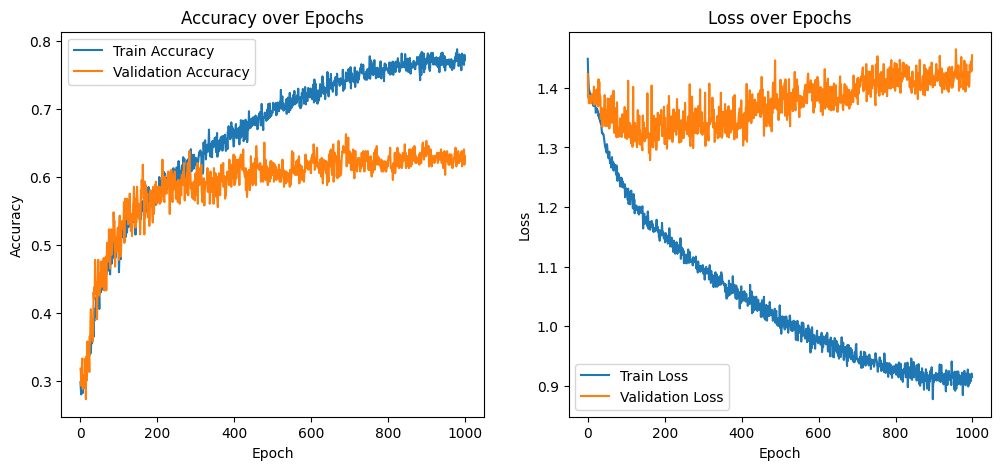

In [ ]:
'''NUMBER ONE'''

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Depthwise-Separable Convolution Block
class DepthwiseSeparableConv(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(DepthwiseSeparableConv, self).__init__()
        self.depthwise = nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=stride,
                                   padding=1, groups=in_channels, bias=False)
        self.pointwise = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.depthwise(x)
        x = self.pointwise(x)
        x = self.bn(x)
        x = self.relu(x)
        return x

# Label Smoothing Cross Entropy
def label_smoothing_cross_entropy(pred, target, smoothing=0.1):
    n_classes = pred.size(1)
    log_preds = F.log_softmax(pred, dim=1)
    with torch.no_grad():
        true_dist = torch.zeros_like(log_preds)
        true_dist.fill_(smoothing / (n_classes - 1))
        true_dist.scatter_(1, target.unsqueeze(1), 1 - smoothing)
    return torch.mean(torch.sum(-true_dist * log_preds, dim=1))

def check_accuracy(loader, model, device):
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    model.train()
    return correct / total

# Small CNN | 53k Parameters
class ReducedEfficientCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(ReducedEfficientCNN, self).__init__()

        self.initial_conv = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True)
        )

        self.layers = nn.Sequential(
            DepthwiseSeparableConv(16, 32, stride=2),
            DepthwiseSeparableConv(32, 32, stride=1),
            DepthwiseSeparableConv(32, 64, stride=2),
            DepthwiseSeparableConv(64, 64, stride=1),
            DepthwiseSeparableConv(64, 128, stride=2),
            DepthwiseSeparableConv(128, 128, stride=1)
        )

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        self.classifier = nn.Sequential(
            nn.Linear(128, 128, bias=False),
            nn.BatchNorm1d(128),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.initial_conv(x)
        x = self.layers(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x


if __name__ == "__main__":

    num_classes = len(train_classes)  # Ensure `train_classes` is defined
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    batch_size = 16
    learning_rate = 0.001
    num_epochs = 1000

    # Extensive Data Augmentation for Training
    train_transform = transforms.Compose([
        transforms.RandomResizedCrop((64, 64), scale=(0.7, 1.0), ratio=(0.8, 1.2)),
        transforms.RandomRotation(degrees=20),
        transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(p=0.2),
        transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), shear=15),
        transforms.RandomGrayscale(p=0.1),
        transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0)),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])

    # Validation and Test: minimal augmentation, only the needed
    val_test_transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])

    train_data = datasets.ImageFolder(root=train_dir, transform=train_transform)
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)

    val_data = datasets.ImageFolder(root=val_dir, transform=val_test_transform)
    val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

    test_data = datasets.ImageFolder(root=test_dir, transform=val_test_transform)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

    model = ReducedEfficientCNN(num_classes=num_classes).to(device)

    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)

    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs, eta_min=1e-5)

    train_acc_history = []
    val_acc_history = []
    train_loss_history = []
    val_loss_history = []

    best_val_acc = 0.0
    best_model_state = None

    test_acc_history = []
    best_test_acc = 0.0

    params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print("Number of parameters:", params)

    for epoch in range(num_epochs):
        running_loss = 0.0
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = label_smoothing_cross_entropy(outputs, labels, smoothing=0.1)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        scheduler.step()

        train_loss = running_loss / len(train_loader.dataset)
        train_acc = check_accuracy(train_loader, model, device)
        val_acc = check_accuracy(val_loader, model, device)
        test_acc = check_accuracy(test_loader, model, device)

        val_loss_running = 0.0
        model.eval()

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = label_smoothing_cross_entropy(outputs, labels, smoothing=0.3)
                val_loss_running += loss.item() * images.size(0)

        val_loss = val_loss_running / len(val_loader.dataset)

        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc)

        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc)

        test_acc_history.append(test_acc)

        if test_acc > best_test_acc:
            best_test_acc = test_acc
            best_model_state = model.state_dict()

        print(f"Epoch [{epoch+1}/{num_epochs}]: "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}%, "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc*100:.2f}%, "
              f"Test Acc: {test_acc*100:.2f}%")

    if best_model_state is not None:
        best_model_path = "/content/myModel.pkl"
        torch.save(best_model_state, best_model_path)
        print(f"Best model saved with Test Accuracy: {best_test_acc*100:.2f}% at {best_model_path}")

    plt.figure(figsize=(12, 7))
    plt.subplot(1, 2, 1)
    plt.plot(train_acc_history, label='Train Accuracy')
    plt.plot(val_acc_history, label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(train_loss_history, label='Train Loss')
    plt.plot(val_loss_history, label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [8]:
'''Accuracy on Test Set after loading the model'''

import os
from PIL import Image
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

test_dir = "/content/drive/MyDrive/Dog_Emotion/test"
train_dir = "/content/drive/MyDrive/Dog_Emotion/train"

train_classes = os.listdir(train_dir)

def compute_test_accuracy(best_model_path, test_loader, model_class, num_classes, device):
    """
    Function to compute test accuracy using the best model saved during training.

    Parameters:
    - best_model_path: Path to the saved model file.
    - test_loader: DataLoader for the test dataset.
    - model_class: The class of the model to be instantiated.
    - num_classes: The number of output classes for the model.
    - device: The device (CPU or GPU) to run the computation.

    Returns:
    - test_accuracy: The test accuracy of the model on the test dataset.
    """
    # Load the best model
    model = model_class(num_classes=num_classes).to(device)
    model.load_state_dict(torch.load(best_model_path, map_location=device))
    model.eval()

    # Compute test accuracy
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    test_accuracy = correct / total
    print(f"Test Accuracy with Best Model: {test_accuracy * 100:.2f}%")
    return test_accuracy

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Extensive Data Augmentation for Training
train_transform = transforms.Compose([
transforms.RandomResizedCrop((64, 64), scale=(0.7, 1.0), ratio=(0.8, 1.2)),
transforms.RandomRotation(degrees=20),
transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
transforms.RandomHorizontalFlip(),
transforms.RandomVerticalFlip(p=0.2),
transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), shear=15),
transforms.RandomGrayscale(p=0.1),
transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0)),
transforms.ToTensor(),
transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])

batch_size = 16

# Validation and Test: only the needed augmentation
val_test_transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])

test_data = datasets.ImageFolder(root=test_dir, transform=val_test_transform)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

# ---------------------
# Label Smoothing Cross Entropy
# ---------------------
def label_smoothing_cross_entropy(pred, target, smoothing=0.1):
    n_classes = pred.size(1)
    log_preds = F.log_softmax(pred, dim=1)
    with torch.no_grad():
        true_dist = torch.zeros_like(log_preds)
        true_dist.fill_(smoothing / (n_classes - 1))
        true_dist.scatter_(1, target.unsqueeze(1), 1 - smoothing)
    return torch.mean(torch.sum(-true_dist * log_preds, dim=1))

# ---------------------
# Depthwise-Separable Convolution Block
# ---------------------
class DepthwiseSeparableConv(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(DepthwiseSeparableConv, self).__init__()
        self.depthwise = nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=stride,
                                   padding=1, groups=in_channels, bias=False)
        self.pointwise = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.depthwise(x)
        x = self.pointwise(x)
        x = self.bn(x)
        x = self.relu(x)
        return x

# ---------------------
# Small CNN 53k Parameters
# ---------------------
class ReducedEfficientCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(ReducedEfficientCNN, self).__init__()

        self.initial_conv = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True)
        )

        self.layers = nn.Sequential(
            DepthwiseSeparableConv(16, 32, stride=2),
            DepthwiseSeparableConv(32, 32, stride=1),
            DepthwiseSeparableConv(32, 64, stride=2),
            DepthwiseSeparableConv(64, 64, stride=1),
            DepthwiseSeparableConv(64, 128, stride=2),
            DepthwiseSeparableConv(128, 128, stride=1)
        )

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        self.classifier = nn.Sequential(
            nn.Linear(128, 128, bias=False),
            nn.BatchNorm1d(128),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.initial_conv(x)
        x = self.layers(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

num_classes = len(train_classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if __name__ == "__main__":
    best_model_path = "/content/myModel.pkl"
    test_accuracy = compute_test_accuracy(
        best_model_path=best_model_path,
        test_loader=test_loader,
        model_class=ReducedEfficientCNN,
        num_classes=num_classes,
        device=device
    )



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-8-d9f347350239>:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))


Test Accuracy with Best Model: 69.38%


I initially started with a model containing approximately 400k parameters. While this model passed the 67% threshold, I felt that it was not efficient enough. Gradually, I optimized the architecture, significantly reducing the parameter count to around 53k.

The Key improvements I noticed in training included:

Exhaustive Data Augmentation: I applied extensive data augmentation techniques to enhance the model's generalizability. This included random resizing, rotation, color jittering, horizontal and vertical flips, Gaussian blurring, and more.
Low Batch Size and High Epochs: By using a smaller batch size (16) combined with a high number of training epochs (1000), I ensured that the model could gradually learn complex patterns without overloading the computational resources.
Adam Optimizer with Regularization: The Adam optimizer, combined with weight decay for regularization, was chosen because I know its popularity and efficiency in handling non-convex optimization problems typical of deep learning tasks. The addition of label smoothing cross-entropy loss further improved performance by mitigating overconfidence in predictions.

Reference :
To gain deeper insights into the task and get further knowledge, I referred to this article : https://www.nature.com/articles/s41598-023-30442-0.

Model Architecture:
I called the model a Reduced Efficient Convolutional Neural Network (CNN). It contains the following key elements:

Initial Convolutional Layer:
A single convolutional layer with a 3x3 kernel, followed by batch normalization and ReLU activation.
This layer processes the input images and extracts low-level features.
Depthwise-Separable Convolutional Layers:
I utilized depthwise-separable convolutions to significantly reduce the parameter count and computational cost while maintaining high representational power.
The block consists of:
A depthwise convolution
A pointwise convolution
Batch normalization and ReLU activation.
Layer Progression:
The architecture includes 6 depthwise-separable convolution blocks, progressively increasing the feature map dimensions:
Channels: 16 → 32 → 64 → 128.
Strides: Downsampling occurs after every two blocks.
Global Average Pooling:
After the convolutional layers, a global average pooling operation reduces the spatial dimensions to a 1x1 feature map, summarizing the spatial information efficiently.
Then, the Classifier with 4 possible labels in the output layer:
A fully connected layer with 128 units, followed by batch normalization, ReLU activation, dropout (50%), and the final classification layer.

## II. Analyzing a Pre-trained CNN (Filters) (10pt)

In this part, you are going to analyze a (large) pre-trained model. Pre-trained models are quite popular these days, as big companies can train really large models on large datasets (something that personal users can't do as they lack the sufficient hardware). These pre-trained models can be used to fine-tune on other/small datasets or used as components in other tasks (like using a pre-trained classifier for object detection).

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].

You can use the following transform to normalize:

<code>normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])</code>
<a href="https://pytorch.org/vision/stable/models.html">Read more here</a>


1. Load a pre-trained VGG16 with PyTorch using torchvision.models.vgg16(pretrained=True, progress=True, **kwargs) (<a href="https://pytorch.org/vision/stable/models.html#classification">read more here</a>). Don't forget to use the model in evaluation mode (<code>model.eval()</code>).

2. Load the images in the <code>hw1_data/birds</code> folder and display them.

3. Pre-process the images to fit VGG16's architecture. What steps did you take?

4. Feed the images (forward pass) to the model. What are the outputs?

5. Choose an image of a dog in the <code>hw1_data/dogs</code> folder, display it and feed it to network. What are the outputs?

6. For the first 3 filters in the first layer of VGG16, plot their response (their output) for the image from section 5. Explain what do you see.

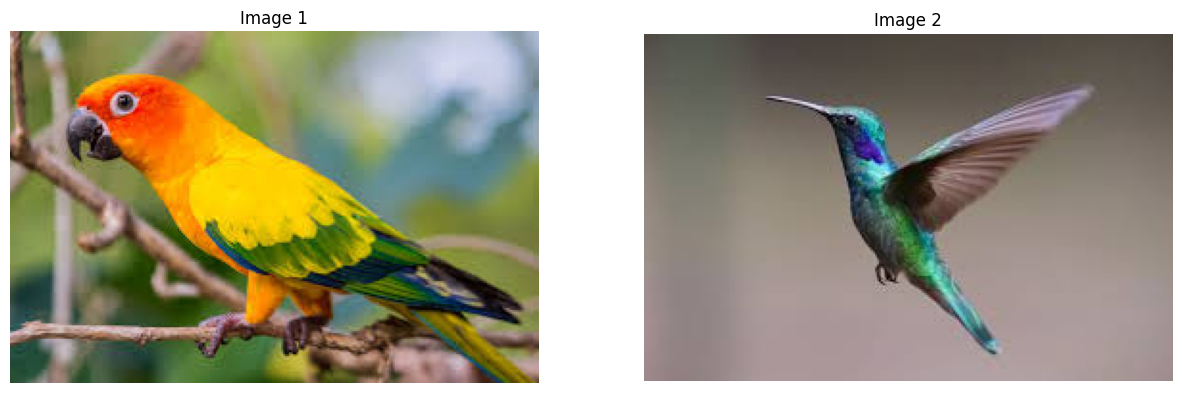


Image 1 - Top Predictions:
Class ID: 90, Probability: 0.6457
Class ID: 88, Probability: 0.3158
Class ID: 11, Probability: 0.0162
Class ID: 92, Probability: 0.0073
Class ID: 95, Probability: 0.0040

Image 2 - Top Predictions:
Class ID: 94, Probability: 0.6281
Class ID: 95, Probability: 0.3708
Class ID: 92, Probability: 0.0010
Class ID: 84, Probability: 0.0001
Class ID: 128, Probability: 0.0000


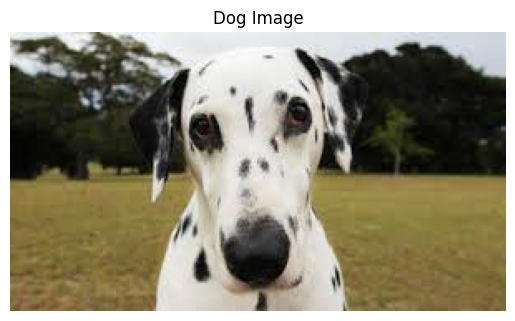


Dog Image - Top Predictions:
Class ID: 251, Probability: 0.8773
Class ID: 246, Probability: 0.1183
Class ID: 176, Probability: 0.0018
Class ID: 172, Probability: 0.0006
Class ID: 169, Probability: 0.0005


In [15]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pre-trained VGG16 model
vgg16 = models.vgg16(pretrained=True, progress=True)

# Move the model to the appropriate device (GPU or CPU)
vgg16 = vgg16.to(device)

# Set the model to evaluation mode
vgg16.eval()

# Transformation pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),          # Scale image to range [0, 1]
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

birds_folder = "/content/birds"

def load_and_display_images(folder_path):
    images = []
    image_names = os.listdir(folder_path)
    fig, axes = plt.subplots(1, len(image_names), figsize=(15, 5))

    for i, image_name in enumerate(image_names):
        img_path = os.path.join(folder_path, image_name)
        img = Image.open(img_path).convert('RGB')  # Ensure RGB format
        images.append(transform(img).unsqueeze(0).to(device))  # Transform and add batch dimension

        # Display image
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"Image {i+1}")

    plt.show()
    return images

# Load bird images
bird_images = load_and_display_images(birds_folder)

# Function to pre-process images
def preprocess_images(folder_path):
    preprocessed_images = []
    image_filenames = os.listdir(folder_path)

    for image_file in image_filenames:
        img_path = os.path.join(folder_path, image_file)

        img = Image.open(img_path).convert("RGB")

        img_tensor = transform(img)
        preprocessed_images.append(img_tensor.unsqueeze(0))

    return preprocessed_images

preprocessed_bird_images = preprocess_images(birds_folder)

# Forward pass function
def forward_pass(images, model):
    softmax = torch.nn.Softmax(dim=1)  # Softmax for class probabilities
    for idx, img_tensor in enumerate(images):
        img_tensor = img_tensor.to(device)  # Move image to the same device as the model
        with torch.no_grad():  # No gradient calculation during inference
            output = model(img_tensor)  # Forward pass
            probabilities = softmax(output)  # Apply softmax to get probabilities
            top_prob, top_class = torch.topk(probabilities, 5)  # Top 5 predictions

        # Print results
        print(f"\nImage {idx + 1} - Top Predictions:")
        for prob, cls in zip(top_prob[0], top_class[0]):
            print(f"Class ID: {cls.item()}, Probability: {prob.item():.4f}")

forward_pass(preprocessed_bird_images, vgg16)

dog_image_path = "/content/dogs/dog_4.jpg"

# Load and display the dog image
def load_and_process_dog_image(image_path, transform):
    img = Image.open(image_path).convert("RGB")
    plt.imshow(img)
    plt.axis('off')
    plt.title("Dog Image")
    plt.show()

    # Apply transformation
    img_tensor = transform(img).unsqueeze(0)
    return img_tensor

# Process and display the dog image
dog_tensor = load_and_process_dog_image(dog_image_path, transform)

# Perform forward pass for the dog image
def forward_pass_single(image_tensor, model):
    softmax = torch.nn.Softmax(dim=1)
    image_tensor = image_tensor.to(device)

    with torch.no_grad():  # No gradients needed during inference
        output = model(image_tensor)  # Forward pass
        probabilities = softmax(output)  # Apply softmax
        top_prob, top_class = torch.topk(probabilities, 5)  # Get top 5 predictions

    # Print the results
    print("\nDog Image - Top Predictions:")
    for prob, cls in zip(top_prob[0], top_class[0]):
        print(f"Class ID: {cls.item()}, Probability: {prob.item():.4f}")

forward_pass_single(dog_tensor, vgg16)




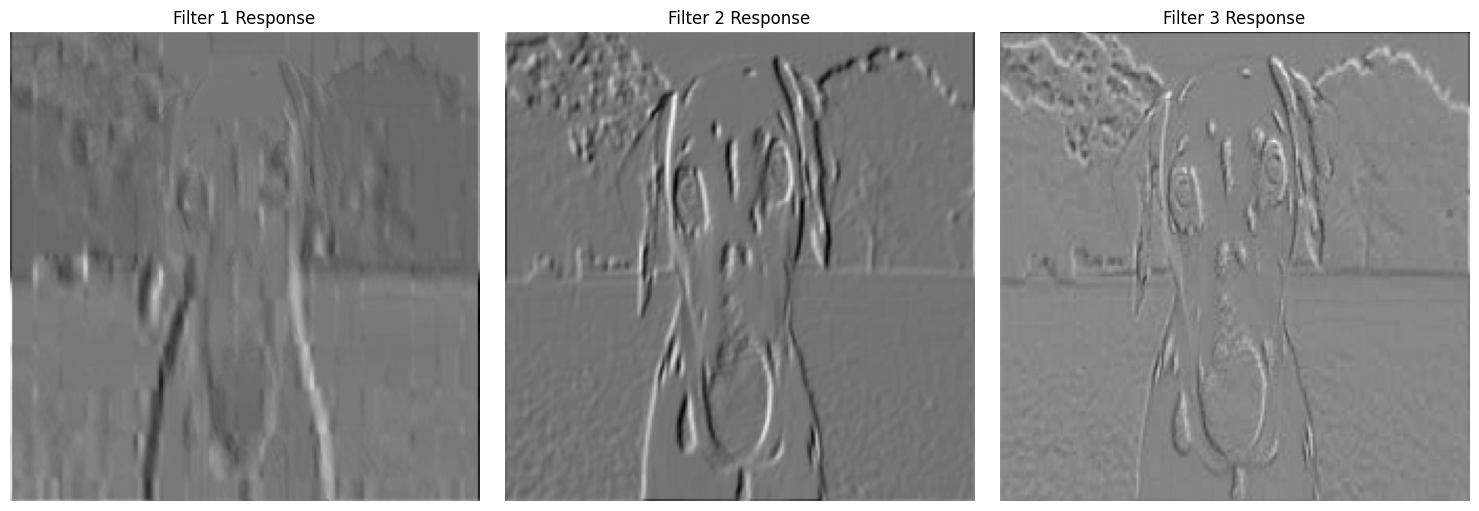

In [13]:
def plot_filter_responses(image_tensor, model):
    # Get the first convolutional layer
    first_conv_layer = model.features[0]

    # Pass the image through the first layer
    with torch.no_grad():
        response = first_conv_layer(image_tensor.to(device))

    # Convert the response to CPU and detach for plotting
    response = response.cpu().detach().numpy()

    # Plot the first 3 filters' responses
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i in range(3):
        axes[i].imshow(response[0, i], cmap='gray')  # Select the ith filter's response
        axes[i].axis('off')
        axes[i].set_title(f"Filter {i + 1} Response")

    plt.tight_layout()
    plt.show()

# Plot the filter responses for the dog image
plot_filter_responses(dog_tensor, vgg16)


3. Pre-process the images to fit VGG16's architecture. What steps did you take?

Resize the Images:
Images were resized to 224x224 pixels using the transforms.Resize function. This matches the input size required by the VGG16 model, which expects images of dimensions (224, 224, 3).

Convert to Tensor:
Images were converted to PyTorch tensors using the transforms.ToTensor function. This scales the pixel values from the range [0, 255] to [0, 1].

Normalize the Pixel Values:
Pixel values were normalized to have a mean of [0.485, 0.456, 0.406] and a standard deviation of [0.229, 0.224, 0.225] using transforms.Normalize. These values correspond to the normalization parameters used during the training of the VGG16 model.

Add a Batch Dimension:
Since the model expects input tensors in the shape (batch_size, 3, 224, 224), a batch dimension was added to each image using the unsqueeze(0) function.

Convert Images to RGB Format:
All images were explicitly converted to RGB format using Image.open(image_path).convert('RGB') to ensure consistency with the VGG16 input requirements.

4. Feed the images (forward pass) to the model. What are the outputs?

The model outputs a tensor of raw scores (logits) for each of the 1,000 classes in the ImageNet dataset. These logits represent unnormalized predictions for the likelihood of each class.

Class Probabilities:
Then we can pass the logits through a softmax function to convert them into class probabilities. These probabilities sum to 1 for each image, representing the model's confidence in each class.

Top Predictions:
For each image, we chose the top 5 predictions and extracted using torch.topk:
Class IDs: The indices of the predicted classes in the ImageNet dataset ( class_id). Probabilities: The corresponding probabilities for these classes, sorted in descending order.

5. Choose an image of a dog in the hw1_data/dogs folder, display it and feed it to network. What are the outputs?

As previouly said, the output of VGG16 when an image is passed through it is a 1D tensor of size 1000, corresponding to the 1000 classes of the ImageNet dataset. Then, we also looked at the top probabilities to consider the top 5 predictions of the model given the dog picture we chose.

6. For the first 3 filters in the first layer of VGG16, plot their response (their output) for the image from section 5. Explain what do you see.

Each filter detects different low-level features from the picture:

Filter 1: general vertical and diagonal edges.
Filter 2: texture and deepness, precise.
Filter 3: and larger-scale shapes.

These filters shows the picture's characterisctics that are turned into features. These features are then used to take decisions in the network.